In [ ]:
"""
MINI PROJECT
 
Build a diabetes prediction model using a dataset (for example, the Pima Indians Diabetes Dataset), we can use supervised learning algorithms such as Logistic Regression, Decision Trees, or Random Forest. Below is a complete code to build a diabetes prediction model, starting from loading the data to training the model and evaluating its performance.

Steps:
Data Loading: Load the dataset.
Data Preprocessing: Clean and prepare the data.
Model Training: Train a logistic regression model (you can replace it with other models like Decision Trees or Random Forest).
Model Evaluation: Evaluate the model using accuracy, confusion matrix, and classification report.
"""

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.shape

(768, 9)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [21]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [29]:
import seaborn as sns

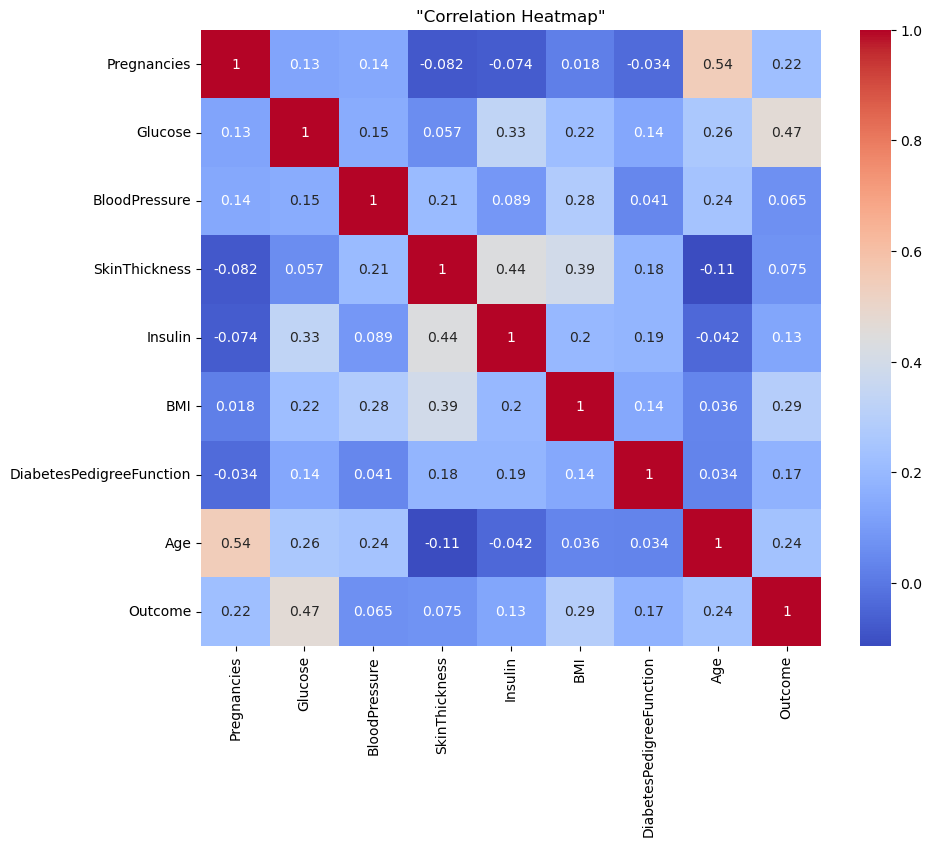

In [30]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('"Correlation Heatmap"')
plt.show()

In [32]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [33]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [35]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [41]:

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_log = log_model.predict(x_test)
print(" \033[1;31m Logestic Regression Model \033[0m")
print("\n \033[1;33m  Accuracy :\033[0m", round(accuracy_score(y_test, y_pred_log)* 100, 2),'%')
print("\n \033[1;33m  Confusion Matrix :\n\033[0m", confusion_matrix(y_test, y_pred_log))
print("\n \033[1;33m  Classification Report :\n\033[0m", classification_report(y_test, y_pred_log) )


  Logestic Regression Model 

   Accuracy : 76.91 %

   Confusion Matrix :
 [[337  68]
 [ 74 136]]

   Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       405
           1       0.67      0.65      0.66       210

    accuracy                           0.77       615
   macro avg       0.74      0.74      0.74       615
weighted avg       0.77      0.77      0.77       615



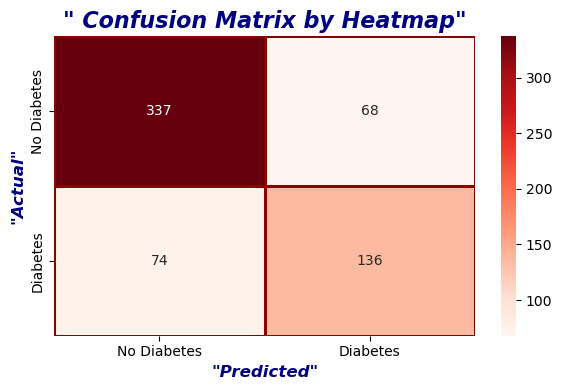

In [49]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels =['No Diabetes', 'Diabetes'],
            yticklabels =['No Diabetes', 'Diabetes'],
            linewidth =2, linecolor='darkred')
plt.title('" Confusion Matrix by Heatmap"', fontsize=16, fontweight='bold', fontstyle='italic', color='navy')
plt.xlabel('"Predicted"', fontsize=12, fontweight='bold', fontstyle='italic', color='navy')
plt.ylabel('"Actual"', fontsize=12, fontweight='bold', fontstyle='italic', color='navy')
plt.tight_layout()
plt.show()

In [51]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

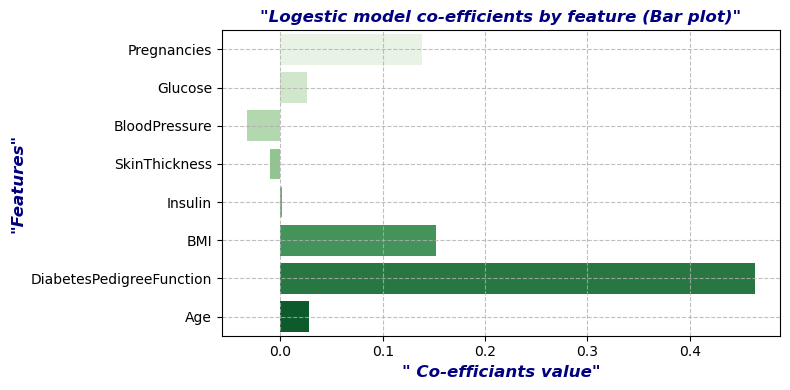

In [53]:
coefficients = log_model.coef_[0]
features = x.columns

plt.figure(figsize=(8, 4))
sns.barplot(x = coefficients, y = features, palette='Greens', linewidth=4)
plt.title('"Logestic model co-efficients by feature (Bar plot)"', fontsize=12, fontweight='bold', fontstyle='italic', color='navy')
plt.xlabel('" Co-efficiants value"', fontsize=12, fontweight='bold', fontstyle='italic', color='navy')
plt.ylabel('"Features"', fontsize=12, fontweight='bold', fontstyle='italic', color='navy')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [55]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

print("\033[1;32m Decision Tree Classification\033[0m")
print("\n \033[1;33m  Accuracy :\033[0m", round(accuracy_score(y_test, y_pred_dt)* 100, 2),'%')
print("\n \033[1;33m  Confusion Matrix :\n\033[0m", confusion_matrix(y_test, y_pred_dt))
print("\n \033[1;33m  Classification Report :\n\033[0m", classification_report(y_test, y_pred_dt) )


 Decision Tree Classification

   Accuracy : 64.88 %

   Confusion Matrix :
 [[286 119]
 [ 97 113]]

   Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       405
           1       0.49      0.54      0.51       210

    accuracy                           0.65       615
   macro avg       0.62      0.62      0.62       615
weighted avg       0.66      0.65      0.65       615



In [59]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print(" \033[1;32m Random Forest Classification \033[0m")
print("\n \033[1;31m  Accuracy :\033[0m", round(accuracy_score(y_test, y_pred_rf)* 100, 2),'%')
print("\n \033[1;31m  Confusion Matrix :\n\033[0m", confusion_matrix(y_test, y_pred_rf))
print("\n \033[1;31m  Classification Report :\n\033[0m", classification_report(y_test, y_pred_rf) )

  Random Forest Classification 

   Accuracy : 75.12 %

   Confusion Matrix :
 [[336  69]
 [ 84 126]]

   Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       405
           1       0.65      0.60      0.62       210

    accuracy                           0.75       615
   macro avg       0.72      0.71      0.72       615
weighted avg       0.75      0.75      0.75       615



In [69]:
log_acc = round(accuracy_score(y_test, y_pred_log)*100,2)
dt_acc = round(accuracy_score(y_test, y_pred_dt)*100,2)
rf_acc = round(accuracy_score(y_test, y_pred_rf)*100,2)
print(log_acc, dt_acc, rf_acc)

76.91 64.88 75.12


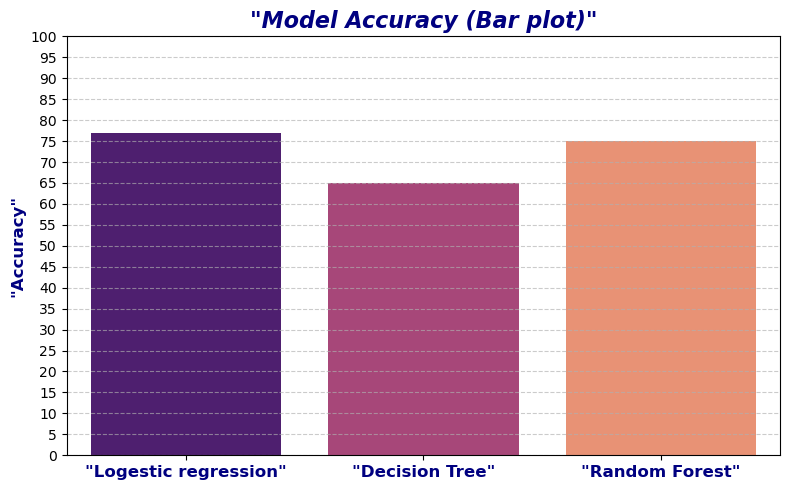

In [63]:
models = ['"Logestic regression"', '"Decision Tree"', '"Random Forest"']
accuracy_scores = [log_acc, dt_acc, rf_acc]

plt.figure(figsize=(8,5))
sns.barplot(x = models, y=accuracy_scores, palette='magma')
plt.title('"Model Accuracy (Bar plot)"', fontsize=16, fontweight='bold', fontstyle='italic', color='navy')
plt.ylabel('"Accuracy"', fontsize=12, fontweight='bold', color='navy')
plt.xticks(fontsize=12, fontweight='bold', color='navy')
plt.yticks(range(0,101,5))
plt.grid(axis='y', linestyle='--', alpha=0.65)
plt.tight_layout()
plt.show()

In [73]:
log_acc = round(accuracy_score(y_test, y_pred_log)*100,2)
dt_acc = round(accuracy_score(y_test, y_pred_dt)*100,2)
rf_acc = round(accuracy_score(y_test, y_pred_rf)*100,2)

print("Logestic Regression Accuracy :", log_acc)
print("Decision Tree Accuracy :", dt_acc)
print("Random Forest Accuracy :", rf_acc)

Logestic Regression Accuracy : 76.91
Decision Tree Accuracy : 64.88
Random Forest Accuracy : 75.12
